In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('FIFA 2018 Statistics.csv')


In [ ]:
y=(df["Man of the Match"]=='Yes')
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
X = df[feature_names]

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
my_model=RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [ ]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=ffc24518b648ac5d0d815ab9a96ded40eac485b3e2e989ef0284cfaf89db95a2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm=PermutationImportance(my_model,random_state=1).fit(val_X,val_y)

In [ ]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [ ]:
## Yukarıya doğru olan değerler en önemli özelliklerdir, aşağıya doğru olanlar ise en az öneme sahiptir.

In [ ]:
## rastgele karıştırmayla performansı gösterir.

In [ ]:
#Özellik önemi hangi değişkenlerin tahminleri en çok etkilediğini gösterirken,
#kısmi bağımlılık grafikleri bir özelliğin tahminleri nasıl etkilediğini gösterir.

In [ ]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)


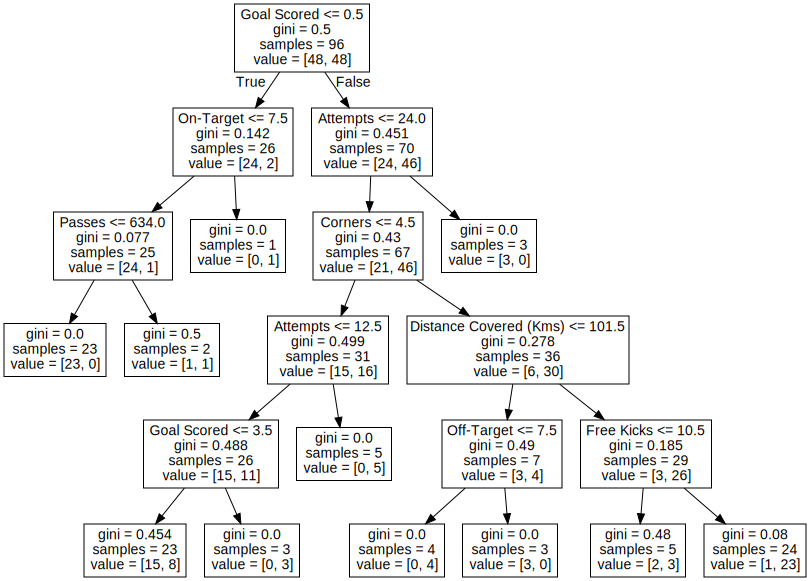

In [ ]:
agac_Graph=tree.export_graphviz(tree_model,out_file=None, feature_names=feature_names)
graphviz.Source(agac_Graph)

In [ ]:
## aralarındaki farkı anlamak için 2D
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

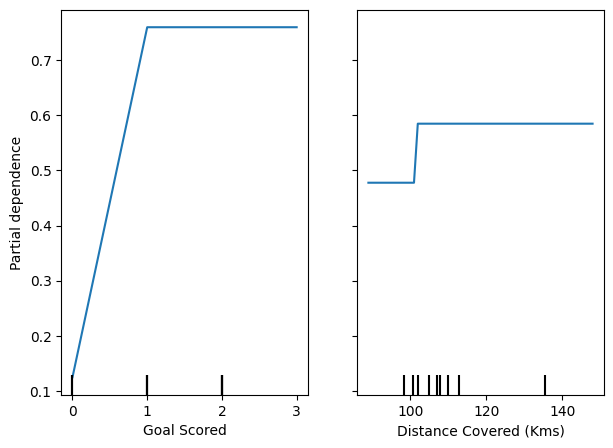

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
f_names=['Goal Scored','Distance Covered (Kms)']
display=PartialDependenceDisplay.from_estimator(tree_model,val_X,f_names,ax=ax)
plt.show()

In [1]:
## model çalışma mantığı

In [7]:
## yapılan tahmine karşılık yorumlar.
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("FIFA 2018 Statistics.csv")

In [11]:
y = (df['Man of the Match'] == "Yes")
feature_names = [i for i in df.columns if df[i].dtype in [np.int64, np.int64]]
X = df[feature_names]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train,x_val,Y_train,y_val=train_test_split(X,y,random_state=1)

In [13]:
my_model=RandomForestClassifier(random_state=0).fit(X_train, Y_train)

In [14]:
row_to_show = 5
tahmin_data = x_val.iloc[row_to_show]

In [16]:
tahmin_data_array = tahmin_data.values.reshape(1, -1)


my_model.predict_proba(tahmin_data_array)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

In [18]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [19]:
import shap

In [20]:
## nesne olusturmak

In [21]:
aciklama=shap.TreeExplainer(my_model)

shap_values=aciklama.shap_values(tahmin_data)

In [24]:
shap.initjs()
shap.force_plot(aciklama.expected_value[1],shap_values[1],tahmin_data)


In [25]:
##shap.DeepExplainer, Derin Öğrenme modelleriyle çalışır.
##shap.KernelExplainer tüm modellerle çalışır, ancak diğer Açıklayıcılardan daha yavaştır

In [27]:
k_aciklama=shap.KernelExplainer(my_model.predict_proba,X_train)
K_shap_values=k_aciklama.shap_values(tahmin_data)
shap.initjs()
shap.force_plot(k_aciklama.expected_value[1],K_shap_values[1],tahmin_data)

In [28]:
##SHAP değerinin toplanmasının permütasyon önemi ve kısmi bağımlılık grafikleri

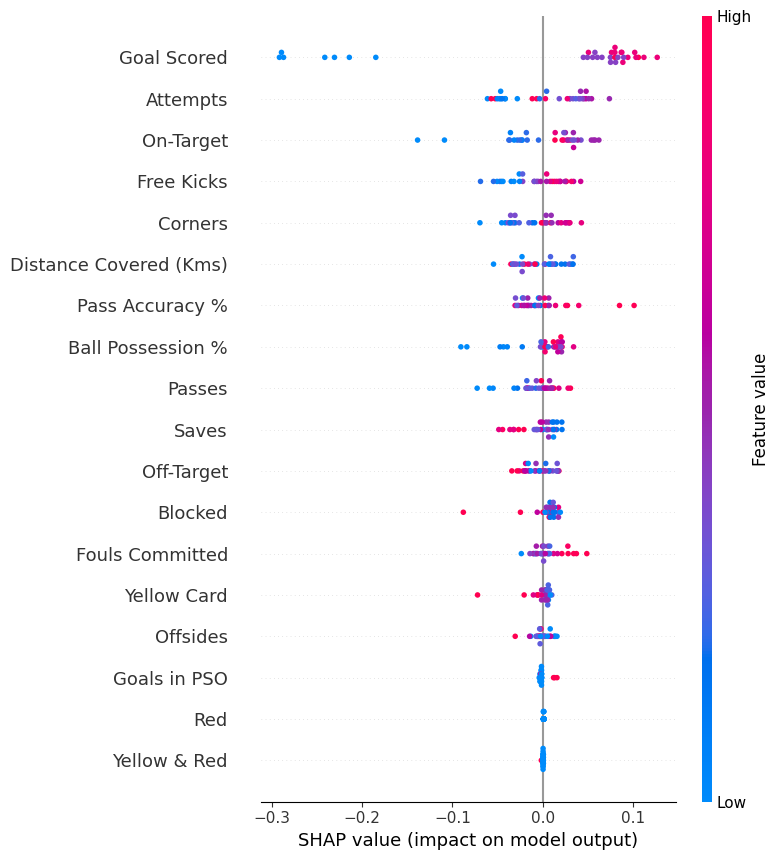

In [29]:
aciklama2 = shap.TreeExplainer(my_model)

shap_values2 = aciklama2.shap_values(x_val)


shap.summary_plot(shap_values2[1], x_val)

In [30]:
# sarı kırmızı kartın bir önemi yok anlamına geliyor


In [31]:
##Genel olarak topa sahip olmak, bir takımın oyuncusunun ödülü kazanma şansını arttırır.
##Ancak sadece bir gol atarlarsa bu durum tersine döner ve hakemler, eğer o kadar az gol atarlarsa, topa çok sahip oldukları için onları cezalandırabilir.

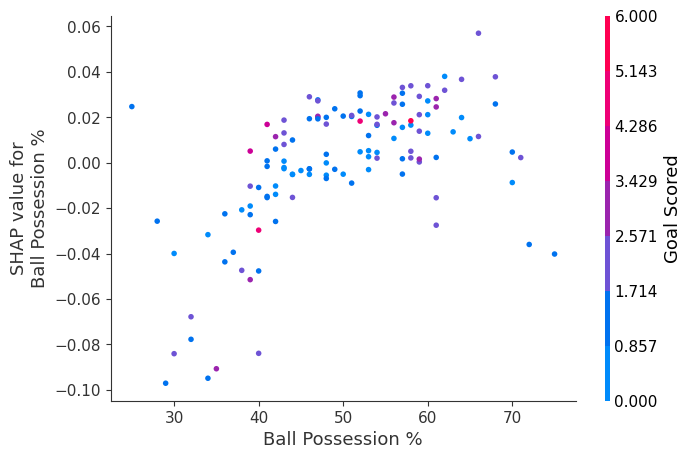

In [37]:
shap_values3 = aciklama2.shap_values(X)
shap.dependence_plot('Ball Possession %', shap_values3[1], X, interaction_index="Goal Scored")

In [38]:
## kodun kendisini yazmak yerine, sonuçlar hakkında eleştirel düşünmektir.

In [39]:
## interaction_index i tanımlayayı unutma